In [1]:
from utils import *
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [2]:
def fingerprint_pipeline(filename):
    # load the image and normalize
    img = np.array(cv.imread(f'./data/{filename}', 0))
    normalized = normalize_image(img)

    # segment and normalize the image
    masked, normalized_2, mask = segment_and_normalize(normalized, block_size=8, std_ratio=0.34) 

    # orientation estimation and rendering
    orient = estimate_orientation_map(normalized, 14)
    orient_render = render_orientation_lines(masked, mask, orient, 14)

    # ridge frequency estimation and Gabor filtering
    ridge_freq = ridge_frequency(normalized_2, mask, orient)
    gabor = gabor_filter(normalized_2, orient, ridge_freq)

    # skeletonization
    skeleton_morph = morphological_skeleton(gabor)
    skeleton_k3m = k3m_skeleton(gabor, mask)

    # minutiae
    minutiae_morph, df_morph  = extract_minutiae(skeleton_morph)
    minutiae_k3m, df_k3m = extract_minutiae(skeleton_k3m)

    fig, axes = plt.subplots(2, 4, figsize=(10, 8))

    titles = ["Normalized", "Masked", "Orientation Map", "Gabor Filtered",
        "Morphological Skeleton", "K3M Skeleton", "Morphological Minutiae", "K3M Minutiae"]

    images = [normalized, masked, orient_render, gabor, 
        skeleton_morph, skeleton_k3m, minutiae_morph, minutiae_k3m]

    cmaps = ['gray'] * 8

    for ax, img, title, cmap in zip(axes.flat, images, titles, cmaps):
        ax.set_title(title)
        ax.imshow(img, cmap=cmap)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    return df_morph, df_k3m

In [13]:
def fingerprint_output(filename):
    img = np.array(cv.imread(f'./data/{filename}', 0))
    normalized = normalize_image(img)
    masked, normalized_2, mask = segment_and_normalize(normalized, block_size=8, std_ratio=0.34) 
    orient = estimate_orientation_map(normalized, 14)
    orient_render = render_orientation_lines(masked, mask, orient, 14)
    ridge_freq = ridge_frequency(normalized_2, mask, orient)
    gabor = gabor_filter(normalized_2, orient, ridge_freq)
    skeleton_k3m = k3m_skeleton(gabor, mask)
    minutiae_k3m, df_k3m = extract_minutiae(skeleton_k3m, draw_arrows=True)

    fig, axes = plt.subplots(1, 2, figsize=(6, 4))

    titles = ["Normalized", "K3M Minutiae"]
    images = [normalized, minutiae_k3m]
    cmaps = ['gray'] * 2

    for ax, img, title, cmap in zip(axes.flat, images, titles, cmaps):
        ax.set_title(title)
        ax.imshow(img, cmap=cmap)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    return df_k3m

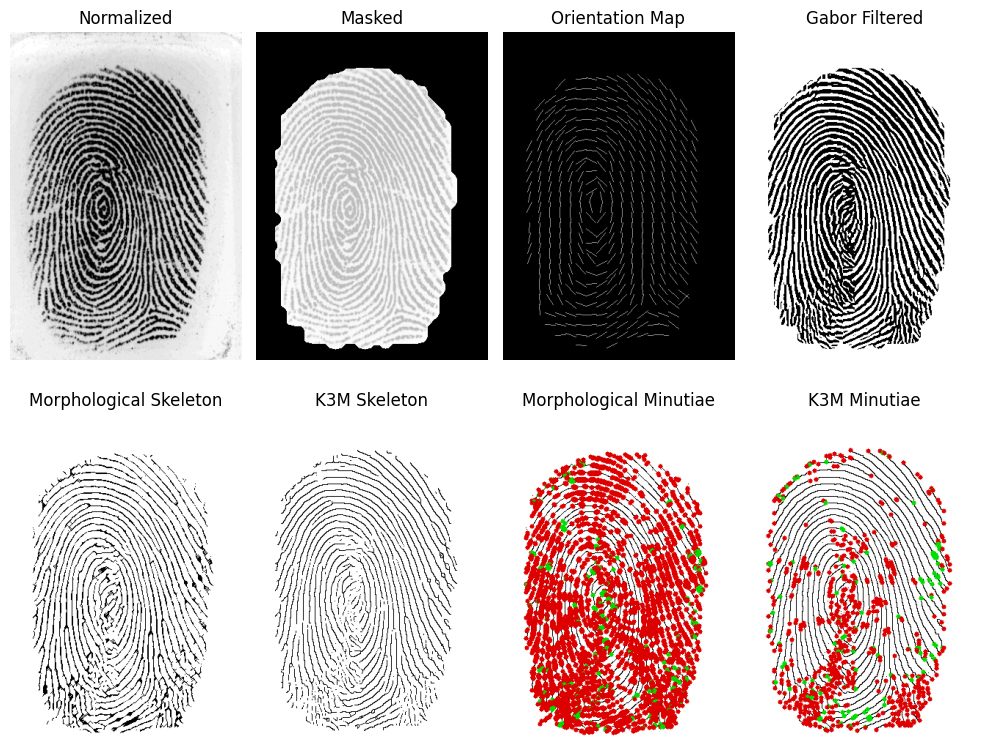

In [4]:
df_morph, df_k3m = fingerprint_pipeline('test.png')

In [6]:
df_morph

,x,y,type,angle
0,142,54,ending,None
1,146,55,ending,None
2,166,55,ending,None
3,182,55,ending,None
4,145,56,ending,None
...,...,...,...,...
5747,121,434,ending,None
5748,153,434,ending,None
5749,154,434,ending,None
5750,110,435,ending,None


In [7]:
df_k3m

,x,y,type,angle
0,138,49,ending,1.570796
1,162,50,ending,1.570796
2,178,50,ending,1.570796
3,182,52,ending,2.356194
4,182,53,bifurcation,1.570796
...,...,...,...,...
805,104,431,ending,-0.785398
806,112,431,ending,-1.570796
807,173,431,ending,-1.570796
808,106,432,ending,-1.570796


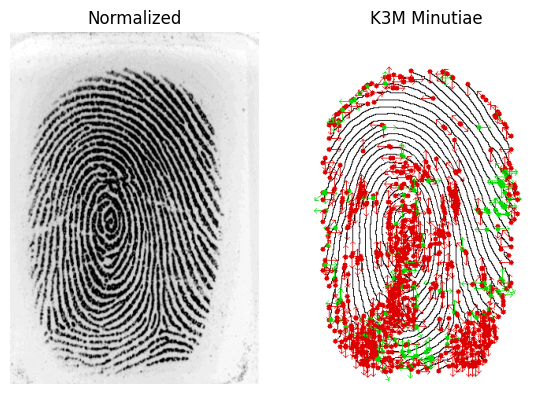

In [14]:
df_k3m = fingerprint_output('test.png')

In [15]:
df_k3m

,x,y,type,angle
0,138,49,ending,1.570796
1,162,50,ending,1.570796
2,178,50,ending,1.570796
3,182,52,ending,2.356194
4,182,53,bifurcation,1.570796
...,...,...,...,...
805,104,431,ending,-0.785398
806,112,431,ending,-1.570796
807,173,431,ending,-1.570796
808,106,432,ending,-1.570796
